In [1]:
import numpy as np
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from matplotlib import pyplot as plt
# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader:
    def __init__(self):
        self.label_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
        self.mnist = keras.datasets.mnist
        (train_X, self.train_Y), (test_X, self.test_Y) = self.mnist.load_data()
        self.train_X = np.asarray(train_X) / 255.0
        self.test_X = np.asarray(test_X) / 255.0
        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')
    def show_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X.images[i:i+1]) #plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label_names[self.train_Y[i]])
        plt.show()
def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")
    #train_history = history.history["accuracy"]
    #validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")


C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\framework\dty

In [2]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""
from tensorflow import keras
#import data_reader
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 2  # 예제 기본값은 20입니다.
# 데이터를 읽어옵니다.
dr = DataReader()
# 인공신경망을 제작합니다.



Data Read Done!
Training X Size : (60000, 28, 28)
Training Y Size : (60000,)
Test X Size : (10000, 28, 28)
Test Y Size : (10000,)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


************ TRAINING START ************ 
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2603 - acc: 0.9260 - val_loss: 0.1344 - val_acc: 0.9603
Epoch 2/2
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1150 - acc: 0.9662 - val_loss: 0.0973 - val_acc: 0.9696


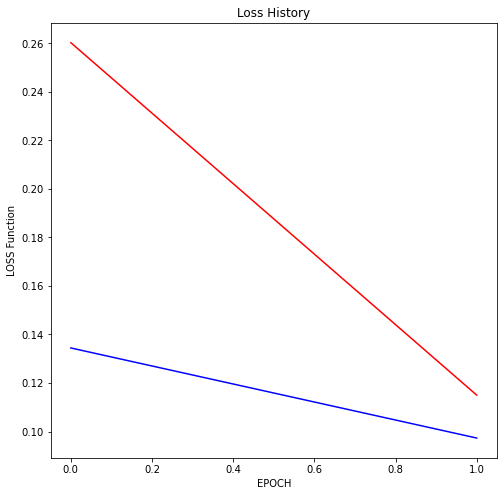

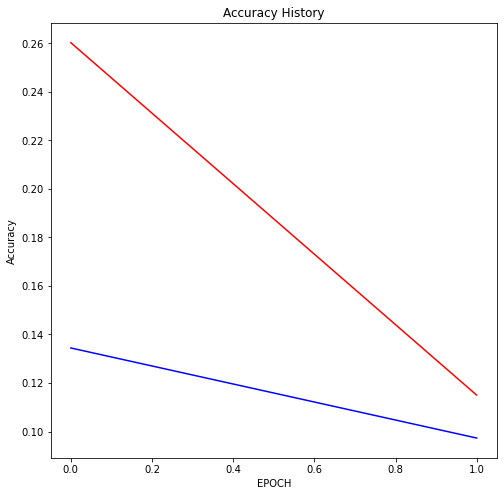

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])
# 학습 결과를 그래프로 출력합니다.
draw_graph(history)

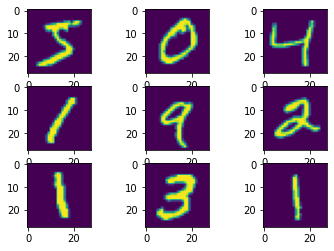

In [5]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(dr.train_X[i] )
plt.show()